<br><br><br>
<h1 style='font-size:50px'>Анализ результатов A/B теста</h1>

Описание проекта
===

Часть 1. Приоретизация гипотез
---

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ А/В теста
---

Постройте график:
* Кумулятивной выручки по группам. Сделайте выводы и предположения.
* Кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

Точечные графики и поиск аномалий:
* Точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перецентили количества заказов на пользователя. Выберите границу аномальности.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

Посчитайте статистическую значимость различий:
* В конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* В среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* В конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* В среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Примите решение по результатам теста и объясните его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

<br><br><br>
Импорт данных и библиотек
===

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

**Таблица 1. Гипотезы**

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Всё просто

**Таблица 2. Заказы**

In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


* Пропусков нет
* Названия полей мне не нравятся, заменю их при предобработке
* Изменить тип данных у поля дата

**Таблица 3. Визиты**

In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


* Пропусков нет
* Изменить тип поля дата на datetime
* Заметка. Название намекает, что в данных количество уникальных посетителей, а не визитов

<br><br><br>
Предобработка данных
===

**Изменяю названия столбцов в таблице Заказы**

In [8]:
orders.columns = ['id_transaction', 'id_visitor', 'date', 'revenue', 'group']
orders.columns

Index(['id_transaction', 'id_visitor', 'date', 'revenue', 'group'], dtype='object')

Успешно.

**Меняю тип переменной с датой на datetime во всех таблицах**

In [9]:
orders['date'] = orders['date'].astype('datetime64')
visitors['date'] = visitors['date'].astype('datetime64')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
id_transaction    1197 non-null int64
id_visitor        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Замена проведена успешна. Приступаю к анализу данных.

<br><br><br>
Часть 1. Приоретизация гипотез
===

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Рейтинг гипотез по методу RICE и ICE (с сортировкой по RICE)**

In [12]:
# Рассчитываю ICE, RICE
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']

# Создаю 2 таблицы с рейтингами
ICE = hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).reset_index(drop=True).reset_index().rename(columns={'index':'ICE_rate'})
RICE = hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).reset_index(drop=True).reset_index().rename(columns={'index':'RICE_rate'})

# Изменяю нумерация на нумерацию с 1-единицы, а не 0-нуля
ICE['ICE_rate'] = ICE['ICE_rate'] + 1
RICE['RICE_rate'] = RICE['RICE_rate'] + 1

# Объединяю таблицы
ICE_RICE_rating = ICE.merge(RICE, on='Hypothesis')

# Изменяю порядок столбцов
ICE_RICE_rating = ICE_RICE_rating[['RICE_rate', 'RICE', 'Hypothesis', 'ICE_rate', 'ICE']]

In [13]:
# Вывожу таблицу с сортировкой по RICE
ICE_RICE_rating.sort_values(by='RICE_rate').style.hide_index().set_properties(**{'text-align': 'left'})

RICE_rate,RICE,Hypothesis,ICE_rate,ICE
1,112,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",3,11.2
2,56,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",5,7
3,40,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",2,13.3333
4,40,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",4,8
5,16.2,"Запустить акцию, дающую скидку на товар в день рождения",1,16.2
6,9,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,1.125
7,4,"Запустить собственную службу доставки, что сократит срок доставки заказов",6,2
8,4,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",7,1.33333
9,3,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",9,1


Приоритетные гипотезы видны в таблице.

**Как изменилась приоритизация гипотез при применении RICE вместо ICE?**  Гипотезы, которые охватывают бОльшее кол-во пользователей, получили более высокий рейтинг по RICE. Поэтому данный метод я считаю более ценным, и вывел таблицу с сортировкой по RICE.

**RICE всегда будет больше, чем ICE.** Это чистая математика, по-скольку в числитель дроби добавляется еще одна, всегда положительная, переменная. А Reach при любом методе расчета будет положительным, т.к. характеризует величину охвата пользователей, которая меньше 0-нуля быть не может.

<br><br><br>
Часть 2. Анализ A/B теста
===

Модуль 1. Кумулятивные метрики
---

* Кумулятивной выручки по группам.
* Кумулятивного среднего чека по группам.
* Относительное изменения кумулятивного среднего чека.
* Кумулятивной конверсии по группам.
* Относительное изменение кумулятивной конверсии

Кумулятивная выручка
---

In [14]:
# создаем массив уникальных пар значений дат и групп теста
# получаю все дату, когда проводился A/B тест, и все группы на эту дату

dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [15]:
# Получаю строки таблицы orders, дата которых меньше или равна дате элемента из dates_groups, 
# а группа теста равна группе из dates_groups

orders_agg = (dates_groups
              .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
              .agg({'date':'max', 'group':'max', 'id_transaction':'nunique', 'id_visitor':'nunique', 'revenue':'sum'}), axis=1)
              .sort_values(by=['date','group'])
              .rename(columns={'id_transaction':'transactions', 'id_visitor':'buyers'})
             )

orders_agg.head()

,date,group,transactions,buyers,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [16]:
# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

visitors_agg = (dates_groups
                .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                .sort_values(by=['date','group'])
                )

visitors_agg.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [17]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [18]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


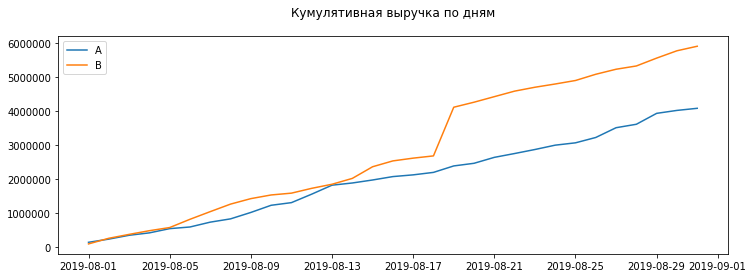

In [20]:
# Настраиваю размер графика
plt.subplots(figsize=(12, 4))

# Строим график выручки группы А и В
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка по дням', pad=20)
print('')

**Вывод**

* Группа B опережает группу А по динамике накопленния выручки
* Это опережение начинает быть явно заметным с 4-го дня теста и сохраняется до конца
* 13 августа заметно «касание» 2-х графиков, значит в этот день их выручки были почти равны
* В группе В 19 августа произошел резкий рост выручки, возможно, из-за увеличения кол-ва покупок, или среднего чека

Итого выделяю 3 интересных отрезка: первые 5 дней, «касание» 13 авугста, резкий рост 19 августа

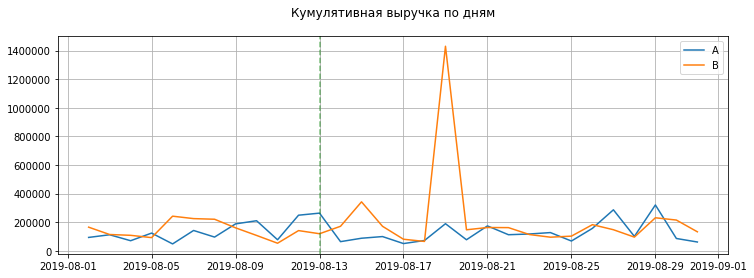

In [61]:
plt.subplots(figsize=(12, 4))
# Строим график выручки группы А и В
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'].diff(), label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'].diff(), label='B')
plt.axvline('2019-08-13', linestyle='--', color='green', alpha=0.5)

plt.legend()
plt.title('Кумулятивная выручка по дням', pad=20)
plt.grid(True)
plt.show();

<br><br>
Кумулятивный средний чек
---

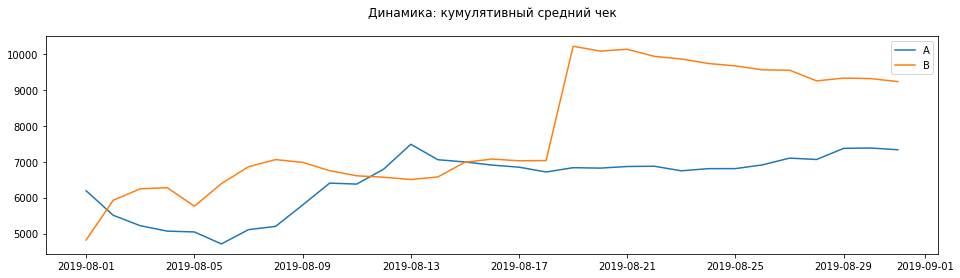

In [21]:
plt.subplots(figsize=(16, 4))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.legend()
plt.title('Динамика: кумулятивный средний чек', pad=20)
print('')

**Вывод: Не все так однозначно, как на первом графике**

* В первые 5 дней динамика среднего чека группы В растет, а группы А падает, но динаимка выручки у них совпадает, значит в группе А покупают чаще, но дешевле.
* 13 августа, когда граики выручки «соприкоснулись» произошло следующее: средний чек группы В резко снизился, а в группе А поднялся.
* 19 августа произошел резкий рост среднего чека в группе В, это объясняет рост выручки.

**Инетересные отрезки графика**
* После 19 авг и до конца теста динамика среднего чека в группе В отричательная, а в группе А положительная. Что легко объяснимо: резкий скачок среднего чека 19 августа создал высокую базу для расчета. И если (а по графику так и есть) после этого продолжали покупать «как обычно», то конечно накопленный средний чек стал снижаться.
* 6 августа для группы А — точка минимального среднего чека. Почему он снижался так резко, а потом начал расти? Предмет для дальнейших исследований.

<br><br>
Относительное различие средних чеков
---


In [22]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = (cumulative_revenue_a
                             .merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                            )

merged_cumulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


In [23]:
# Отношение средних чеков, группы В к группе А
aov_b_to_a = ((merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
              /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])
              -1
             )
aov_b_to_a.head()

0   -0.221447
1    0.075987
2    0.196810
3    0.238495
4    0.142161
dtype: float64

> AOV — average order value

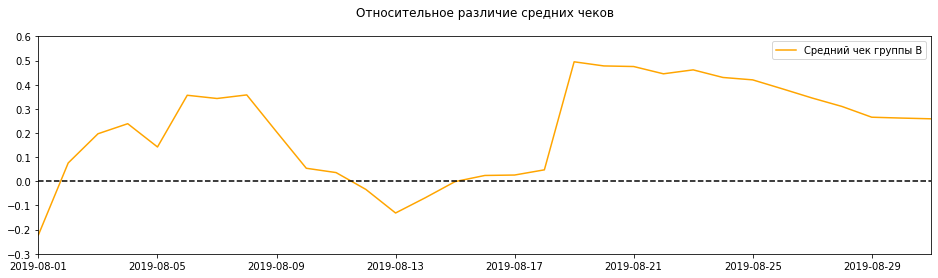

In [24]:
plt.subplots(figsize=(16, 4))

# cтрою отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], aov_b_to_a, label="Средний чек группы В", color='orange')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.6])
plt.legend()
plt.title('Относительное различие средних чеков', pad=20)
print('')

**Вывод**

* Преимущество группы B обеспечено 2-мя участками резкого роста, лишь в последние 9 дней график стабилизировался
* Поэтому на вопрос «Превосходит ли группа B группу А по сренему чеку» я сейчас отвечу так: «Да, но это обеспечено несколькии крупными заказами». Или так: «В группе В больше крупных заказов, но периода теста мало,чтобы понять, носит и это системный характер».

<br><br>
Кумулятивная конверсия
---

In [25]:
cumulative_data['cr'] = round(((cumulative_data['buyers'] / cumulative_data['visitors']) * 100), 2)
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,cr
0,2019-08-01,A,24,20,148579,719,2.78
1,2019-08-01,B,21,20,101217,713,2.81
2,2019-08-02,A,44,38,242401,1338,2.84
3,2019-08-02,B,45,43,266748,1294,3.32
4,2019-08-03,A,68,62,354874,1845,3.36


In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_cr_a = cumulative_data[cumulative_data['group']=='A'][['date','cr']]
cumulative_cr_b = cumulative_data[cumulative_data['group']=='B'][['date','cr']]

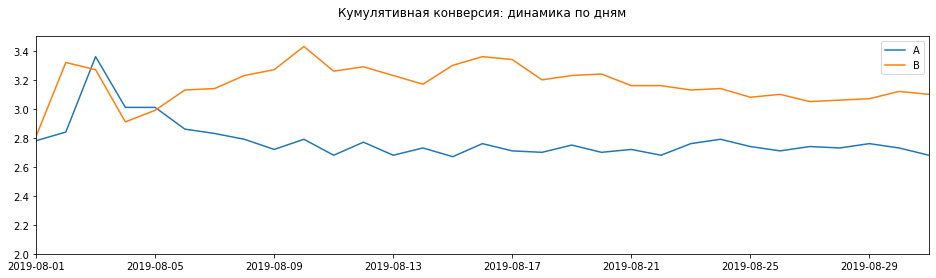

In [67]:
# Настраиваю размер графика
plt.subplots(figsize=(16, 4))

# Строим график выручки группы А
plt.plot(cumulative_cr_a['date'], cumulative_cr_a['cr'], label='A')
plt.plot(cumulative_cr_b['date'], cumulative_cr_b['cr'], label='B')

plt.legend()
plt.title('Кумулятивная конверсия: динамика по дням', pad=20)
plt.axis(["2019-08-01", '2019-08-31', 2, 3.5])
print('')

**Выводы**

* Конверсия в группе B стабильно выше, чем в группе А за **период теста,** однако окончательного вывода в данный момент я сделать не могу, т.к. конверсия группы B выше, но имеет тренд к снижению, а конверсия группы A стабильна. 
* После резких скачков конверсии в первые 5 дней далее Cr стабилизировался в обоих группах


<br><br>
Относительное изменение кумулятивной конверсии
---

In [28]:
# Обединяю данных 2-х групп в один датафрейм
merged_cumulative_cr = (
                        cumulative_cr_a[['date','cr']]
                        .merge(cumulative_cr_b[['date','cr']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                        )

merged_cumulative_cr.head()

,date,crA,crB
0,2019-08-01,2.78,2.81
1,2019-08-02,2.84,3.32
2,2019-08-03,3.36,3.27
3,2019-08-04,3.01,2.91
4,2019-08-05,3.01,2.99


In [29]:
# Отношение конверсий, группы В к группе А
merged_cumulative_cr['relative_b_to_a'] = (merged_cumulative_cr['crB']/merged_cumulative_cr['crA']) - 1
merged_cumulative_cr.head()

,date,crA,crB,relative_b_to_a
0,2019-08-01,2.78,2.81,0.010791
1,2019-08-02,2.84,3.32,0.169014
2,2019-08-03,3.36,3.27,-0.026786
3,2019-08-04,3.01,2.91,-0.033223
4,2019-08-05,3.01,2.99,-0.006645


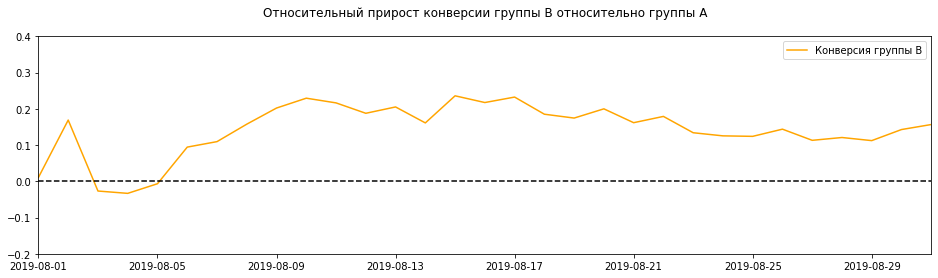

In [30]:
# Настраиваю размер графика
plt.subplots(figsize=(16, 4))

# Строю график
plt.plot(merged_cumulative_cr['date'], merged_cumulative_cr['relative_b_to_a'], label="Конверсия группы В", color='orange')

plt.legend()
plt.title('Относительный прирост конверсии группы B относительно группы A', pad=20)
plt.axhline(y=0, color='black', linestyle='--')
#plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.4])
print('')

**Вывод: тест стоит продолжать.** Конверсия группы В стабильно выше группы А на 10-15%, но я бы продолжил тест еще на 2 недели, чтобы удостовериться на 100%, т.к. небольшой, но все же заметный отрицательный тренд группы B присутствует. 

<br><br><br><br>
Модуль 2. Точечные графики и определение аномалий
---

* Точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перецентили количества заказов на пользователя. Выберите границу аномальности.
* Точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

Поиск аномально больших покупок и определение границ аномальности
---

In [31]:
# Рассчитываю кол-во заказов на пользователя
orders_by_users = orders.groupby('id_visitor', as_index=False).agg({'id_transaction':'nunique'})
orders_by_users.columns = ['id_visitor', 'orders']
orders_by_users.sort_values('orders', ascending=False).head()

,id_visitor,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Ого, кое кто сделал и по 11 заказов. Если это интернет магазин книг, то все понятно, если магазин интим-товаров, то у юзеров 4256040402 и 2458001652 очень хорошая фантазия.

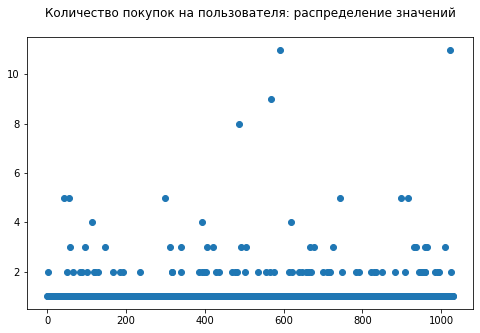

In [71]:
plt.subplots(figsize=(8, 5))

# Строю точечную диаграмму
plt.scatter(orders_by_users.index, orders_by_users['orders'])
plt.title('Количество покупок на пользователя: распределение значений', pad=20)
print('')

**Большинство пользователей совершили 1 заказа.** Но есть заметная доля пользователей с 2 и 3 заказами.

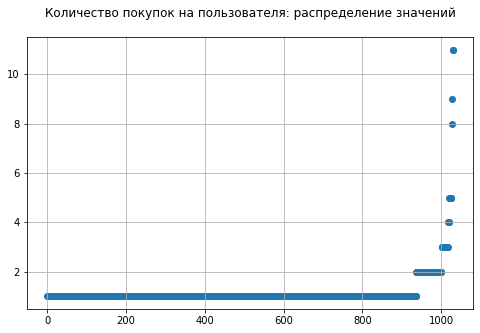

In [77]:
tmp_orders_by_users = orders_by_users.sort_values(by='orders').reset_index()
plt.subplots(figsize=(8, 5))

# Строю точечную диаграмму
plt.scatter(tmp_orders_by_users.index, tmp_orders_by_users['orders'])
plt.title('Количество покупок на пользователя: распределение значений', pad=20)
plt.grid(True)
print('')

**Рассчитываю перцентили**

In [33]:
# Определяю 95-й и 99-й перцентили кол-ва заказов
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

**Выводы**
* 95% пользователей сделали не более 2 заказов.
* 1% пользователей сделали более 4 заказов.

<br><br><br>
Определение границ аномальности по сумме покупки
---

Посмотрю распределение заказов на scatter-графике

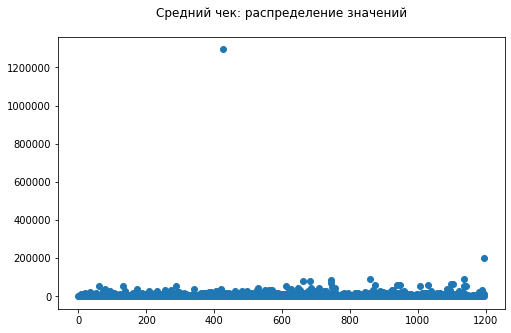

In [34]:
plt.subplots(figsize=(8, 5))
plt.scatter(orders.index, orders['revenue'])
plt.title('Средний чек: распределение значений', pad=20)
print('')

**Есть 2 аномальный заказа: дороже 1,2 млн и около 200 тыс**. Визуально они искажают график, построю без них.

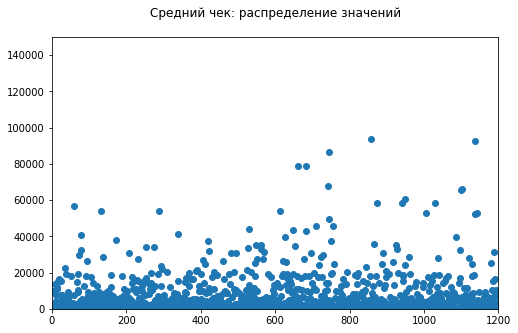

In [35]:
plt.subplots(figsize=(8, 5))
plt.scatter(orders.index, orders['revenue'])
plt.axis([0, 1200, 0, 150000])
plt.title('Средний чек: распределение значений', pad=20)
print('')

**Большинство заказов не дороже 20 тыс.** Но доля заказов больше 20 тыс также достаточно велика. Определю границы аномальности, рассчитав перцентили.

**Определяю точные цифры**

In [36]:
# Определяю 95-й и 99-й перцентили кол-ва заказов
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод**
* 95% заказов не превышают сумму в 28000.
* 99% заказов не превышают сумму в 58233. Заказы на 1,2 млн и 200 тыс, обнаруженные на точечном графике относятся к 1% заказов, дороже 58233 р.

<br><br><br>
Создаю список аномальных id
---

**Границы аномалий по кол-ву заказов:**
* 95% пользователей совершили не более 2 заказов.
* 99% пользователей сделали не более 4 заказов.

**По среднему чеку:**
* 95% заказов не превышают сумму в 28000.
* 99% заказов не превышают сумму в 58233. Заказы на 1,2 млн и 200 тыс, обнаруженные на точечном графике относятся к 1% заказов, дороже 58233 р.

**В обоих случаях я выбираю число, соответсвующее 95-у перцентилю.** 

In [37]:
# Выделяю id юзеров, сделавших более 2 заказов
users_aov_abnormal = orders_by_users[orders_by_users['orders'] > 2]['id_visitor']
users_aov_abnormal.shape

(30,)

In [38]:
# Выделяю id юзеров, купивших более, чем на 28000 р

orders_abnormal = orders[orders['revenue'] > 28000]['id_visitor']
orders_abnormal.shape

(60,)

In [39]:
# Объединяю серии
abnormal_users = pd.concat([users_aov_abnormal, orders_abnormal], axis = 0).drop_duplicates().reset_index(drop=True)
abnormal_users.shape

(83,)

**Всего 84 аномальных покупателя.**

<br><br><br>
Разница в объемах воздействия аномальных пользователей по группам
---

**Создаю список из заказов аномальных юзеров**

In [40]:
orders_abnormal = orders[orders['id_visitor'].isin(abnormal_users)]
orders_abnormal.head()

,id_transaction,id_visitor,date,revenue,group
15,2550768810,2742574263,2019-08-15,15277,B
26,2223239646,199603092,2019-08-15,3488,A
27,1630050528,237748145,2019-08-15,7620,B
29,2220299125,3803269165,2019-08-15,700,A
32,3666913472,2038680547,2019-08-15,1680,B


**Считаю объем заказов и средний чек по группам**

In [41]:
(orders_abnormal
                .pivot_table(index='group', 
                            values=['id_visitor', 'id_transaction', 'revenue'], 
                            aggfunc={'id_visitor':'nunique', 'id_transaction':'count', 'revenue':['sum', 'mean', 'max']})
).round(1)

id_transaction id_visitor    revenue                    
               count    nunique        max     mean        sum
group                                                         
A                 97         55    93940.0  17879.4  1734301.0
B                 94         56  1294500.0  33824.5  3179507.0

**Вывод: на группу В аномальные пользователи оказали намного большее влияние**

* Количество аномальных заказов и пользователей отличается незначительно, не более чем на 5%
* Но в группу В попало 2 очень больших средних заказа: на 1,2 млн и на 200 тыс р.
* Для производства достоверных выводов необходимо провести сравнение метрик в «сырых» и «очищенных» данных.


<br><br><br>
Статистическая значимость различий в «сырых» и «очищенных» данных
---

* В конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* В среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* В конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* В среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Готовлю «сырые» и «очищенные» данные для анализа
---

**«Сырые» данные**

In [42]:
orders[orders['group'] == 'A'].groupby('id_visitor', as_index=False).agg({'id_transaction':'nunique'})

,id_visitor,id_transaction
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [43]:
# Соберу данные о всех покупателях в такую таблицу: id юзера, кол-во заказов
orders_by_users_a = orders[orders['group'] == 'A'].groupby('id_visitor', as_index=False).agg({'id_transaction':'nunique'})
orders_by_users_b = orders[orders['group']=='B'].groupby('id_visitor', as_index=False).agg({'id_transaction':'nunique'})

# Переименую столбцы
orders_by_users_a.columns = ['id_visitor', 'orders']
orders_by_users_b.columns = ['id_visitor', 'orders']

# Вывод
orders_by_users_a.sort_values(by='orders', ascending=False).head()

,id_visitor,orders
499,4256040402,7
227,2038680547,5
278,2458001652,5
269,2378935119,4
18,199603092,4


In [44]:
# Кол-во посетителей в группах
visitors_group_a = visitors[visitors['group']=='A']['visitors'].sum()
visitors_group_b = visitors[visitors['group']=='B']['visitors'].sum()
print(visitors_group_a)
print(visitors_group_b)

18736
18916


In [45]:
# Кол-во покупателей в группах
buyers_group_a = len(orders_by_users_a['orders'])
buyers_group_b = len(orders_by_users_b['orders'])
print(buyers_group_a)
print(buyers_group_b)

503
586


In [46]:
# Создаю серию, длиной в кол-во посетителей, не совершивших заказ
not_buyers_group_a = pd.Series(0, index = np.arange(visitors_group_a - buyers_group_a), name='orders')
not_buyers_group_b = pd.Series(0, index = np.arange(visitors_group_b - buyers_group_b), name='orders')

In [47]:
# Объединяю в одно распределение посетителей и покупателей
# На выходе получаю 2 распределения для 2 групп
sample_a = pd.concat([orders_by_users_a['orders'], not_buyers_group_a], axis=0)
sample_b = pd.concat([orders_by_users_b['orders'], not_buyers_group_b], axis=0)

**«Очищенные» данные**

In [48]:
# Создаю 2 распределения без аномальных юзеров
sample_a_filtered = (pd.concat(
                         [orders_by_users_a[~orders_by_users_a['id_visitor'].isin(abnormal_users)]['orders'],
                         not_buyers_group_a], axis=0)
                    )

sample_b_filtered = (pd.concat(
                         [orders_by_users_b[~orders_by_users_b['id_visitor'].isin(abnormal_users)]['orders'],
                         not_buyers_group_b], axis=0)
                    )

**Итог: на выходе получаю 4 распределения.** Сырые и очищенные данные для каждой группы. Все ни выглядят одинаково одноообразно, поэтому выведу для примера последнее.

In [49]:
sample_a
sample_b
sample_a_filtered
sample_b_filtered.head(5)

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Конверсия: разница в % и статистическая значимость вывода
---

In [50]:
# Разница в конверсии
print('«Сырые» данные')
print('---')
print("Разница в конверсии (группы В к А): {0:.2%}".format(sample_b.mean()/sample_a.mean()-1))
# Значительно ли различие между конверсиями в 2-х группах по сырым данным?
print("Статистическая значимость вывода (p-value): {0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print('')
print('«Очищенные» данные')
print('---')
print("Разница в конверсии (группы В к А): {0:.2%}".format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))
# Значительно ли различие между конверсиями в 2-х группах по сырым данным?
print("Статистическая значимость вывода (p-value): {0:.5f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

«Сырые» данные
---
Разница в конверсии (группы В к А): 13.81%
Статистическая значимость вывода (p-value): 0.00840

«Очищенные» данные
---
Разница в конверсии (группы В к А): 17.57%
Статистическая значимость вывода (p-value): 0.00608


**Выводы**
* **Конверсия группы B** в среднем на 14% больше, чем конверсия группы А по «сырым» данным и **на 17% выше** по «очищенным».
* **Эта разница статистически значима,** т.к. p-value в обоих слчаях намного меньше уровня альфа в 0,05. Следовательно, нулевая гипотеза, звучаящая как «Статистической разницы между 2-я группами по конверсии нет», отвергнута. Разница есть, группа В превращает посетителей в покупателей на 17% успешнее.

Средний чек: разница в % и статистическая значимость вывода
---

In [51]:
# Создаю таблицу без аномальных юзеров
orders_clear = orders[~orders['id_visitor'].isin(abnormal_users)]

In [52]:
print('«Сырые» данные')
print('---')
print("Разница в среднем чеке (группы В к А): {0:.2%}"
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
print("Статистическая значимость вывода (p-value): {0:.3f}"
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('')
print('«Очищенные» данные')
print('---')
print("Разница в среднем чеке (группы В к А): {0:.2%}"
      .format(orders_clear[orders_clear['group']=='B']['revenue'].mean()/orders_clear[orders_clear['group']=='A']['revenue'].mean()-1))
print("Статистическая значимость вывода (p-value): {0:.3f}"
      .format(stats.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])[1]))

«Сырые» данные
---
Разница в среднем чеке (группы В к А): 25.87%
Статистическая значимость вывода (p-value): 0.365

«Очищенные» данные
---
Разница в среднем чеке (группы В к А): -2.21%
Статистическая значимость вывода (p-value): 0.376


**Выводы**
* По «очищенным» данным средний чек группы В меньше группы А на 2%.
* Но статистически эта разница незначима, и условно можно принять, что средний чек 2-х групп равен.

**Пояснение**
* Нулевая гипотеза в данном случае звучит так: «Разницы в среднем чеке нет». 
* Альтернативная так: «Естьдостоверная разница в среднем чеке».
* p-value равен 0.369, что много больше порогового значения альфа в 0.05
* Если p-value больше альфа, нулевую гипотезу отвергнуть невозможно, следовательно **статистически значимой** разницы в среднем чеке нет

<br><br><br>
Вывод: Предлагаю продлить тест еще на 30 дней.
===

**Все рассматриваемые варианты:**

1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Я считаю, что стоит продлить тест, потому что у группы В конверсия группы выше, но динамика этого показателя носит неопределенный характер и может измениться на более большой выборке.

**Подробнее:**

* Средний чек в группах: не имеет статистически значимой разницы, в среднем он равен 5048 р.
* Динамика средних чеков: стабильная, ни в одной из групп не наблюдается тренда к увеличению или снижению.


* Конверсия: **группа В конвертирует посетителей в покупателей на 17.57% лучше, чем группа А.** В среднем, конверсия группы В равна 3.17%, а группы А 2.78%.
* Динамика конверсии: **тренд носит неопределенный характер**, я не могу его охарактеризивать ни как стабильный, ни как положительный/отрицательный. Продемонстрирую на графиках ниже:

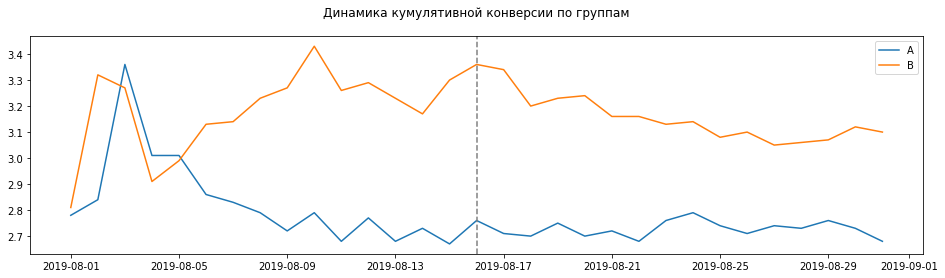

In [80]:
plt.subplots(figsize=(16, 4))
plt.plot(cumulative_cr_a['date'], cumulative_cr_a['cr'], label='A')
plt.plot(cumulative_cr_b['date'], cumulative_cr_b['cr'], label='B')

plt.title('Динамика кумулятивной конверсии по группам', pad=20)
#plt.axis(["2019-08-01", '2019-08-31', 2, 3.5])
plt.axvline(x='2019-08-16', color='grey', linestyle='--')
plt.legend()
print('')

Оценим можем ли мы утверждать, что действительно есть некие намеки на тренды. Оценим наклон линии тренда для каждого графика конверсии и метод позволит оценить значимость этого значения

In [98]:
# формируем данные
x = [*range(1, cumulative_cr_a.query("date >= '2019-08-16'").shape[0] + 1)]
cr_a = cumulative_cr_a.query("date >= '2019-08-16'")['cr']
cr_b = cumulative_cr_b.query("date >= '2019-08-16'")['cr']

In [95]:
# метод линейной регрессии из библиотеки scipy
from scipy.stats import linregress

In [103]:
# применяем метод
linregress(x, cr_a)

LinregressResult(slope=-2.9411764705881073e-05, intercept=2.7289999999999996, rvalue=-0.00449217079216604, pvalue=0.9868267143942996, stderr=0.0017498322778181623)

In [104]:
linregress(x, cr_b)

LinregressResult(slope=-0.017029411764705883, intercept=3.3035000000000005, rvalue=-0.8643572316399132, pvalue=1.57078598523513e-05, stderr=0.002647922361480237)

_Slope_ - наклон линии тренда, который нам нужен
_p-value_ - расчетное значение статзначимости для проверки гипотезы, что _slope = 0_

для обеих групп получили, что наклон отрицательный и _pvalue_ говорит, что нет оснований отвергать нулевую гипотезу, то есть велики шансы, что оба графика стабильны, просто колеблются вокруг среднего.

<hr style="border: 2px solid green;" />

**С 16 дня теста** конверсия группы В носит отрицательный характер, в то время, как конверсия группы А положительный. Но, если применять терминологию статистики, то оба этих утверждения я бы назвал «не имеющими достоверности». Потому что эта динамика настолько слабо выражена, что не дает утверждать однозначно, есть тренд или метрики стабильны.

Продемонстрирую это на на графике относительного изменения конверсии:

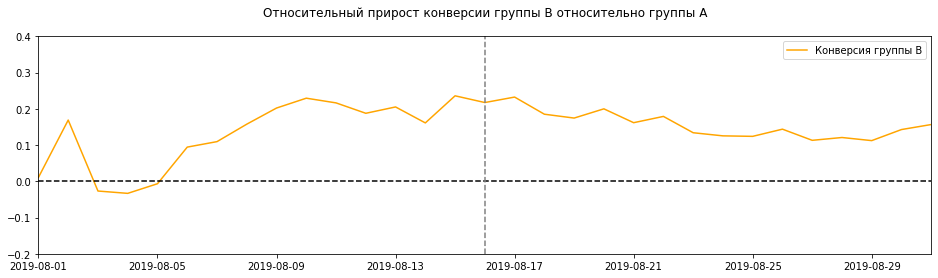

In [54]:
plt.subplots(figsize=(16, 4))
plt.plot(merged_cumulative_cr['date'], merged_cumulative_cr['relative_b_to_a'], label="Конверсия группы В", color='orange')

plt.title('Относительный прирост конверсии группы B относительно группы A', pad=20)
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x='2019-08-16', color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.4])
print('')

Картина повторяется. Сформулирую такое утверждение: «Тренда на снижение нет, но есть намеки на то, что это произойдет в будущем». 

**Поэтому, мой окончательный вывод:**
* По результатам 30 дней теста,
* при равном среднем чеке,
* группа В конвертирует на 17% лучше, чем группы А,
* но есть основания предполагать, что это может измениться в будущем.

**Поэтому я предлагаю продолжить тест еще на 30 дней.** По истечении которых, возможно сделать однозначный вывод о лидерестве/нет группы В.